In [1]:
!$PYTHONPATH

In [2]:
import polars as pl
import numpy as np
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

In [4]:
df = pl.read_parquet("/fast_scratch_1/TRISEP_data/AdvancedTutorial/small_dataset.parquet")
print(df)

shape: (100_000, 2)
┌─────────────────────────────────┬─────────────────────────────────┐
│ target                          ┆ point_cloud                     │
│ ---                             ┆ ---                             │
│ array[f32, 3]                   ┆ list[array[f32, 3]]             │
╞═════════════════════════════════╪═════════════════════════════════╡
│ [1.455413, 15.901725, -571.578… ┆ [[46.253021, 175.486893, -558.… │
│ [22.550814, 3.005712, 834.1053… ┆ [[171.600311, -59.034386, 1070… │
│ [4.511479, -8.75235, -1014.025… ┆ [[33.221375, -178.431686, -106… │
│ [3.536473, -9.28247, -268.1976… ┆ [[87.506714, -158.989197, -558… │
│ [-9.729183, 4.537313, -970.073… ┆ [[33.232174, -178.489685, -110… │
│ …                               ┆ …                               │
│ [13.143321, 14.416292, 1151.87… ┆ [[-176.694656, 41.962231, 1142… │
│ [-6.575313, 3.461314, 1151.884… ┆ [[79.624199, 163.140869, 1127.… │
│ [4.806145, 15.775914, 1151.934… ┆ [[-179.883514, 24.431108, 1106… │


In [5]:
point_cloud = df["point_cloud"].to_numpy()

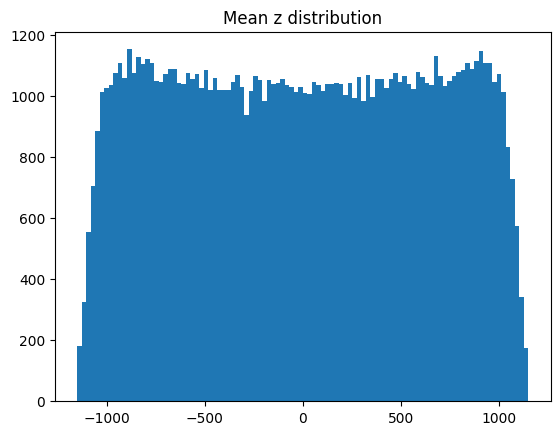

In [6]:
mean_zs = np.array([pc[:, 2].mean() for pc in point_cloud])
plt.hist(mean_zs, 100)
plt.title("Mean z distribution")
plt.show()

In [7]:
from data.dataset import PointCloudDataset

config = {"cloud_size": 140}
dataset = PointCloudDataset(
    "/fast_scratch_1/TRISEP_data/AdvancedTutorial/small_dataset.parquet", config
)

index = 0  # First event
point_cloud, target = dataset[index]

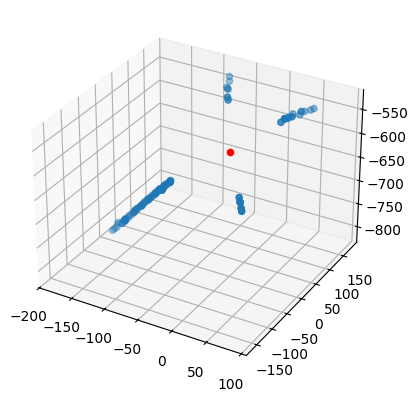

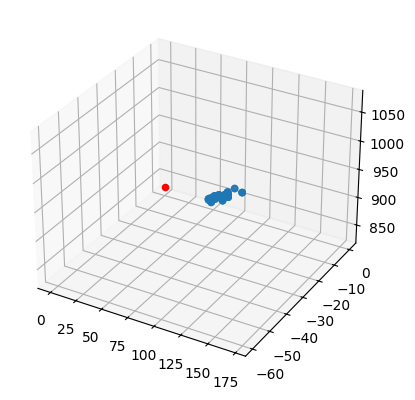

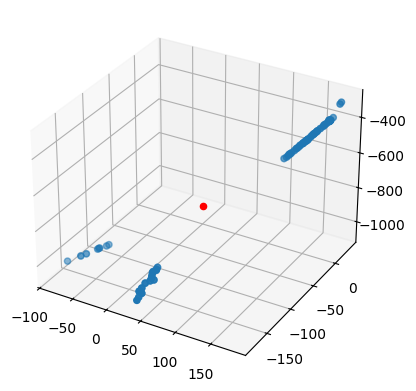

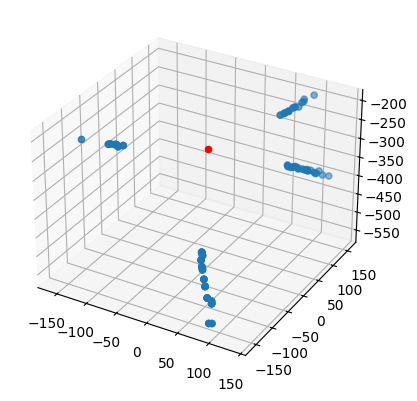

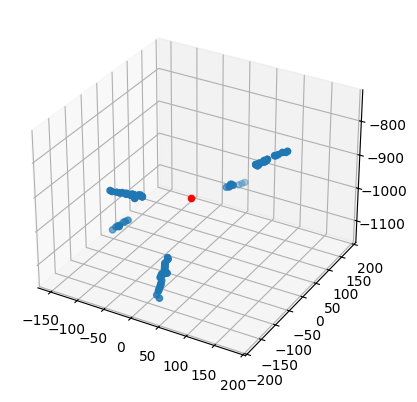

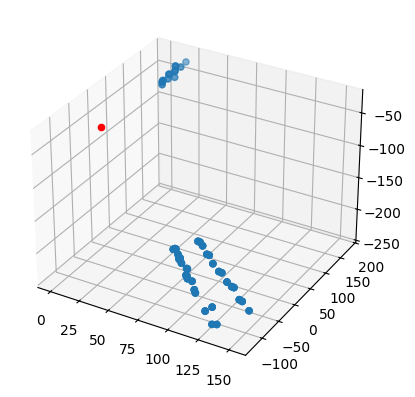

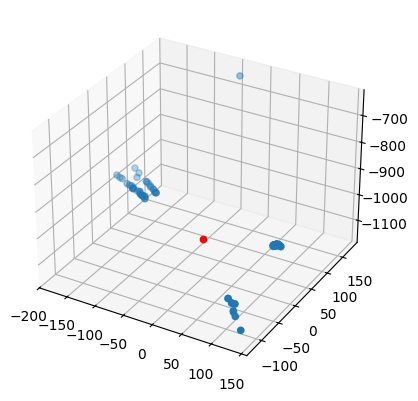

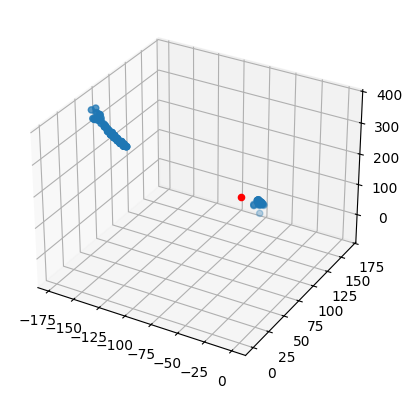

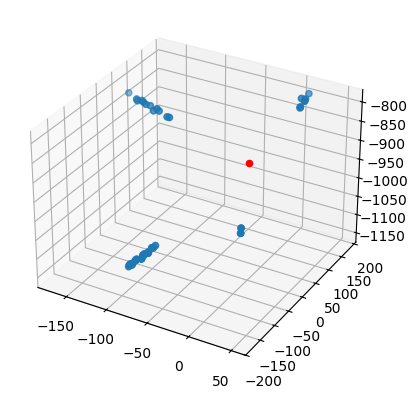

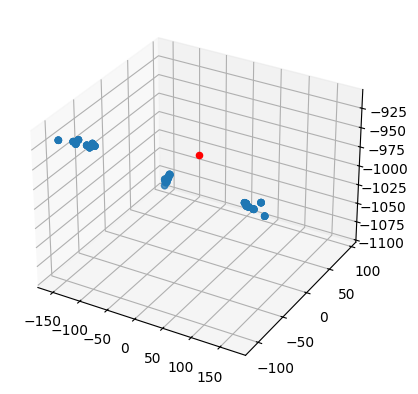

In [8]:
for i in range(10):
    point_cloud, target = dataset[i]
    fig = plt.figure()
    ax = fig.add_subplot(projection="3d")
    
    ax.scatter(point_cloud[0], point_cloud[1], point_cloud[2])
    ax.scatter(0, 0, target.item(), color="red")

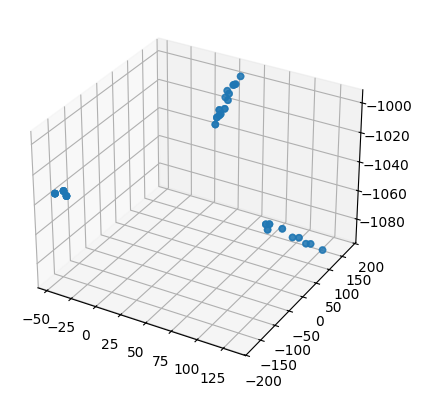

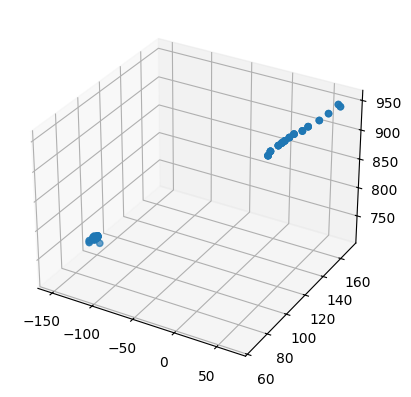

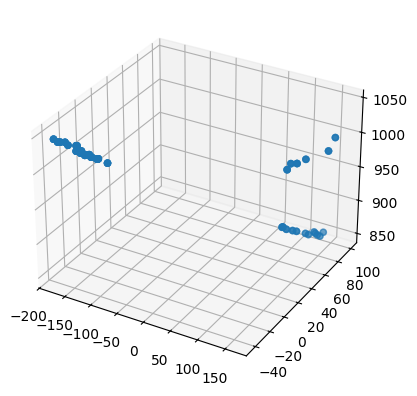

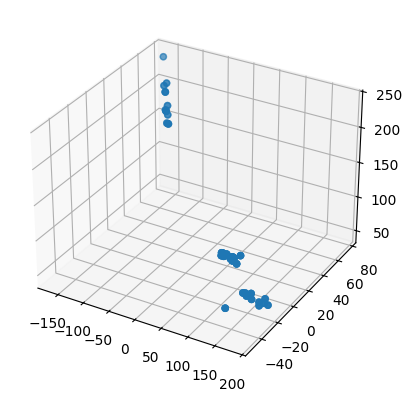

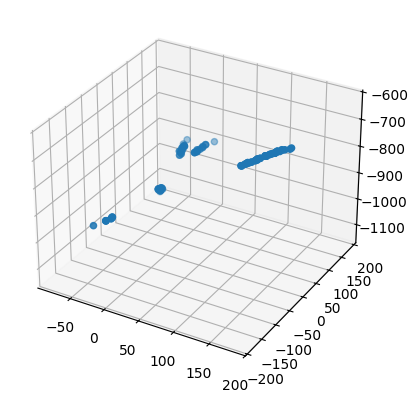

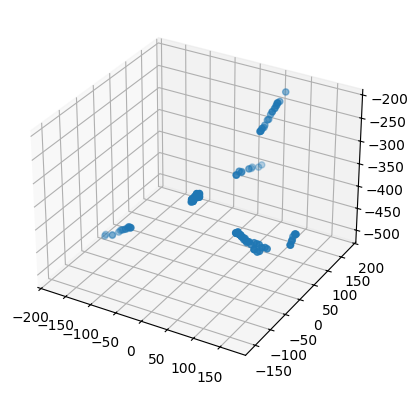

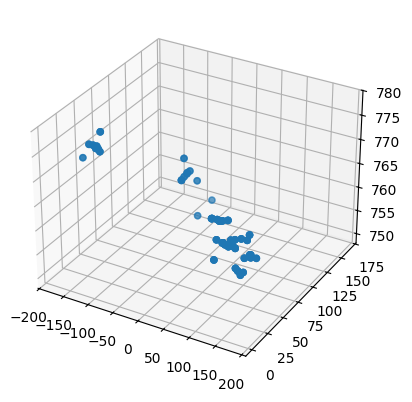

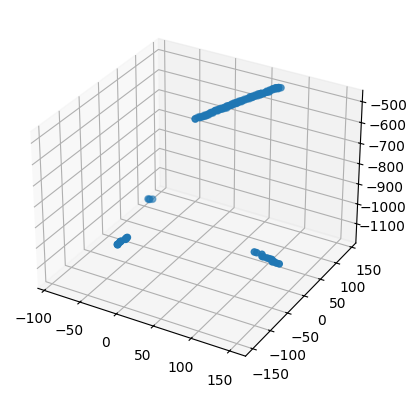

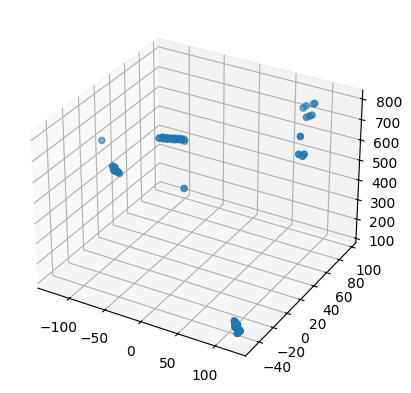

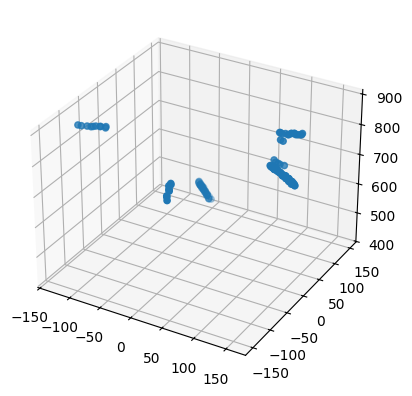

In [9]:
for i in range(10, 20):
    point_cloud, target = dataset[i]
    fig = plt.figure()
    ax = fig.add_subplot(projection="3d")
    
    ax.scatter(point_cloud[0], point_cloud[1], point_cloud[2])
    # ax.scatter(0, 0, target.item(), color="red")

In [10]:
# DATA PREPROCESSING

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
complete_df = pl.read_parquet(
    "/fast_scratch_1/TRISEP_data/AdvancedTutorial/small_dataset.parquet"
)

In [13]:
df_train, df_test = train_test_split(complete_df, test_size=0.2, train_size=0.8, shuffle=True)

In [14]:
df_val, df_testing = train_test_split(df_test, test_size=0.5, train_size=0.5, shuffle=True)

In [15]:
df_train.write_parquet("/home/nda70/data/train.parquet")
df_val.write_parquet("/home/nda70/data/val.parquet")
df_testing.write_parquet("/home/nda70/data/test.parquet")

In [ ]:
mean_zs = np.array([pc[:, 2].mean() for pc in df_train["point_cloud"].to_numpy()])
plt.hist(mean_zs, 100)
plt.title("Mean z distribution")
plt.show()

In [12]:
import pandas as pd

In [13]:
# TRAINED MODEL

In [14]:
df = pd.read_csv("/fast_scratch_1/TRISEP_data/group_1/output/training_log.csv")

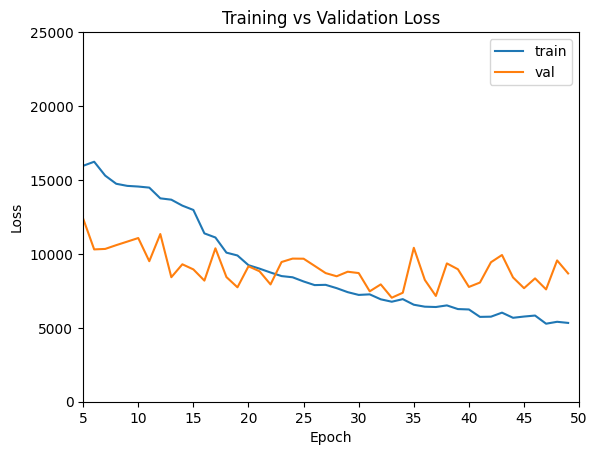

In [23]:
plt.plot(df["epoch"], df["training_loss"], label="train")
plt.plot(df["epoch"], df["validation_loss"], label="val")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.xlim(5,50)
plt.ylim(0,25000)
plt.title("Training vs Validation Loss")
plt.show()

In [46]:
df = pd.read_csv("/home/nda70/data/output_my.csv")
df_before = pd.read_csv("/home/nda70/data/output.csv")

In [25]:
df

,target,prediction
0,-472.453827,-449.224457
1,-723.406555,-714.832886
2,422.734131,386.293793
3,668.642761,621.171997
4,1093.867676,1050.031128
...,...,...
9995,508.304291,489.205963
9996,-753.042786,-736.429688
9997,-335.139648,-506.971954
9998,-722.897583,-678.687744


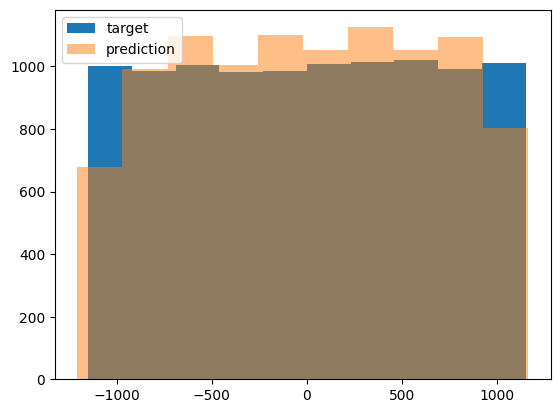

In [28]:
plt.hist(df["target"], label="target")
plt.hist(df["prediction"], label="prediction", alpha=0.5)
plt.legend()

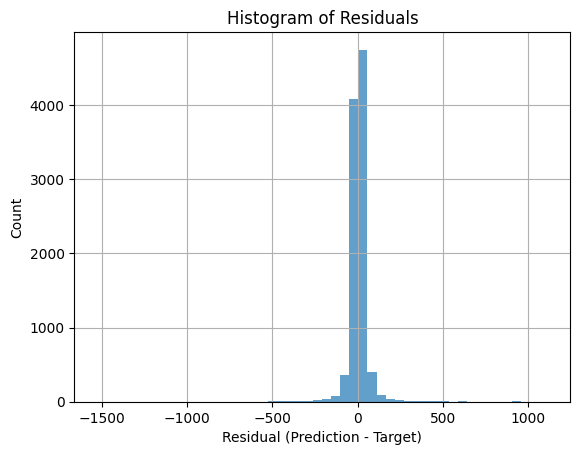

In [44]:
residuals = df["prediction"] - df["target"]
resid_2 = 

plt.hist(residuals, bins=50, alpha=0.7)
plt.xlabel("Residual (Prediction - Target)")
plt.ylabel("Count")
plt.title("Histogram of Residuals")
plt.grid(True)
plt.show()

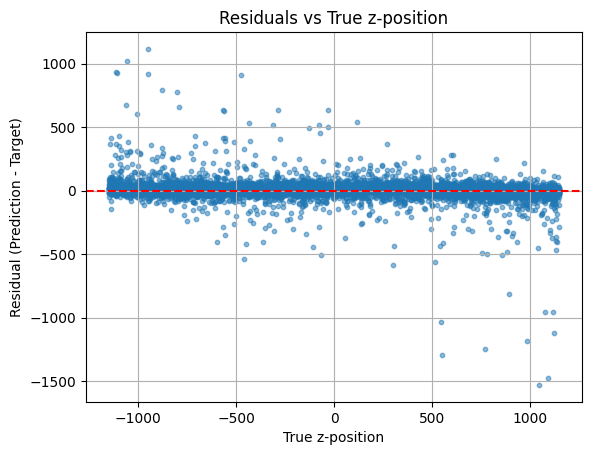

In [45]:
plt.scatter(df["target"], residuals, alpha=0.5, s=10)
plt.xlabel("True z-position")
plt.ylabel("Residual (Prediction - Target)")
plt.title("Residuals vs True z-position")
plt.axhline(0, color='red', linestyle='--')  # Reference line at zero
plt.grid(True)
plt.show()

In [31]:
# SESSION 2 IMPROVING MODEL

In [41]:
import torch
import torch.nn as nn

x = torch.randn(2, 3, 4)
print("Input shape:", x.shape)

x, _= torch.max(x, dim=2)
print("Output shape:", x.shape)

Input shape: torch.Size([2, 3, 4])
Output shape: torch.Size([2, 3])
